### Integrated Time Series

시계열의 Integrated Order $I(d)$는 Covariance-Stationary time Series를 구하는 데 필요한 최소의 difference값을 구하는 통계량이다. 즉, 시계열의 Stationary와 관련된 부분인 것이다 

#### 1. Integration of order

적분 차수 (Integrated order)는 임의의 시계열을 stationary process로 만드는 차수를 의미한다

$$(1-L)^d X_t$$

여기서 $L$은 lag operator, $1-L$은 first difference이다

$$(1-L)X_t = X_t - X_{t-1} = \Delta X$$

만약 원 시계열 자체가 정상성을 가지고 있다면 적분차수 $d = 0$이며 다음과 같이 나타낼 수 있다

$$(1-L)^0X_t = X_t$$

즉, 원 시계열 $X_t$는 이미 stationary하다. 이제껏 다뤄온 거의 모든 시계열 데이터들은 사실 $d=1$인 시계열인 것이다

#### 2. Cointegration

시계열의 적분 차수가 일정 상수 $d$일 때, 시계열의 선형 결합의 적분 차수가 $d$보다 작을 때 시계열 사이에 Cointegration이 존재한다고 한다

**2.1 Spurious Regression**

시계열 데이터를 다루다 보면 흔히 하는 실수 중 하나는, 두 변수간 아무런 관계가 없는데도 불구하고 시간의 변화로 인해 유의한 상관관계가 나타나는 현상을 뜻한다. 그 예시로 여름철 아이스크림 판매량과 익사자수의 상관관계, 미국의 수출 인덱스와 호주의 남성 기대 수명간의 상관관계 등이 있다.

$$X_t = X_{t-1} + u_t, ~~~ u_t \sim N(0,\sigma_u^2)$$
$$Y_t = Y_{t-1} + v_t, ~~~ v_t \sim N(0,\sigma_v^2)$$

확률보행 과정을 따르는 시계열 또는 적분된 시계열의 수준을 분석하는 경우에는 두 시계열이 아무런 관계가 없음에도 불구하고 통계적으로 유의하다는 결론을 낼 확률이 상당히 높게 나타나는 문제가 발생한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

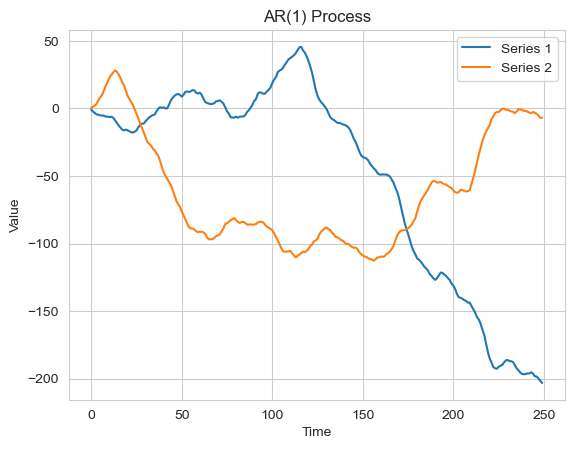

In [2]:
phi = 0.9 # coefficient
mu = 0
sigma = 1
T = 250

np.random.seed(1000)
x0 = np.random.normal(mu, sigma)

np.random.seed(42)
x1 = np.random.normal(mu, sigma)

np.random.seed(1000)
series1 = [x0]
for t in range(1, T):
    x_t = phi * series1[t-1] + np.random.normal(mu, sigma)
    series1.append(x_t)

np.random.seed(42)
series2 = [x1]
for t in range(1, T):
    x_t = phi * series2[t-1] + np.random.normal(mu, sigma)
    series2.append(x_t)

plt.plot(np.array(series1).cumsum(), label = 'Series 1')
plt.plot(np.array(series2).cumsum(), label = 'Series 2')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("AR(1) Process")
plt.legend()
plt.show()

In [3]:
ar_model = sm.OLS(series1, sm.add_constant(series2))
results = ar_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.83
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.42e-14
Time:                        18:14:18   Log-Likelihood:                -497.53
No. Observations:                 250   AIC:                             999.1
Df Residuals:                     248   BIC:                             1006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8244      0.112     -7.333      0.0

위 경우와 같이 단순 AR 모형임에도 불구하고 음의 상관관계를 보인다. 이 경우, 잘못된 관계로 해석할 수도 있는데 이것을 가성적 회귀 현상이라고 한다

**2.2 Cointegrated VAR Models**

k-dimensional $\mathrm{VAR}(p)$ 모형을 따르는 시계열 $\mathbf{x}_t$를 고려하자

$$\mathbf{x}_t = \mathbf{\mu}_t + \mathbf{Φ_1 x_{t-1}} + ⋯ + \mathbf{\Phi_p x_{t-p}} + \mathbf{a_{t}}$$

여기서 만약 모든 행렬식 $|\mathbf{Φ}(B)|$의 0 부분이 unit circle의 바깥 부분에 있다면, $\mathbf{x}_t$는 unit-root stationary하다. 여기서 unit-root stationary하다는 것은 $I(0)$프로세스를 따른다는 것을 의미한다.

편의를 위해, 간단하게 $\mathbf{x}_t$를 order 1를 따르는 intergrated process라고 가정하자. $\mathrm{VAR}(p)$의 Error Correction Model (ECM)은 다음과 같이 나타낼 수 있다

$$\mathbf{\Delta x}_t = \mathbf{\mu}_t + \mathbf{Π x_{t-1}} + \mathbf{Φ_1^* Δx_{t-1}} ⋯ + \mathbf{\Phi_{p-1}^* Δ x_{t-p+1}} + \mathbf{a_{t}}$$

여기서 $\mathbf{Π_1 x_{t-1}}$를 error correction term이라고 한다. 이는 cointegration을 익히는데 있어서 매우 중요한 역할을 한다. $\mathbf{\Phi_i}$는 ECM representation에 따라 다음과 같이 표현 가능하다

$$\mathbf{\Phi}_1 = \mathbf{I + \Pi + \Phi}_1^*$$
$$\mathbf{\Phi}_i = \mathbf{\Phi}_i^* + \mathbf{\Phi}_{i-1}^*$$

$\mathbf{x}_t$는 거의 $I(1)$이라는 가정 하에, 위 식의 $\mathbf{\Delta x}_t$는 $I(0)$프로세스이다. 만약 $\mathbf{x}_t$가 unit root를 가지고 있다면, $|\mathbf{\Phi}(1)| = 0$이다. 따라서 $\mathbf{\Pi} = - \mathbf{\Phi}(1)$는 특이행렬(singular matrix)이다. 결과적으로, ECM을 고려하는데 다음 세 가지 상황을 생각할 수 있다

1. Rank$(\mathbf{\Pi}) = 0$일 경우, $\mathbf{\Pi} = \mathbf{0}$이고 $\mathbf{x}_t$는 cointegrated하지 않다는 것과 같다. 이로 인해 ECM의 식은 다음과 같이 기약된다

$$\mathbf{\Delta x}_t = \mathbf{\mu}_t  + \mathbf{Φ_1^* Δx_{t-1}} ⋯ + \mathbf{\Phi_{p-1}^* Δ x_{t-p+1}} + \mathbf{a_{t}}$$

2. Rank$(\mathbf{\Pi}) = k$일 경우, $|\mathbf{\Pi}(1)| \neq 0$이고 $\mathbf{x}_t$는 unit root가 아니다. 이는 $\mathbf{x}_t$가 $I(0)$이란 것과 같다. 이 경우 ECM model은 정보를 가지고 있는 모형이라 보기 힘들다
3. 0 < Rank$(\mathbf{\Pi}) = m$ < $k$일 경우, $\mathbf{\Pi}$를 다음과 같이 쓸 수 있다

$$\mathbf{\Pi = \alpha \beta^\prime}$$

이 경우의 ECM model은 다음과 같이 풀어 쓸 수 있다

$$\mathbf{\Delta x}_t = \mathbf{\mu}_t + \mathbf{\alpha \beta^\prime x_{t-1}} + \mathbf{Φ_1^* Δx_{t-1}} ⋯ + \mathbf{\Phi_{p-1}^* Δ x_{t-p+1}} + \mathbf{a_{t}}$$

**2.3 Cointegration Test**

가설을 하나 고려해 보자

$$H_0 : \mathrm{Rank}(\mathbf{\Pi}) = m ~~~~~ \mathrm{versus} ~~~~~ H_a : \mathrm{Rank}(\mathbf{\Pi})>m$$

Johansen은 검정을 위해 우도 비율 통계량 (Likelihood Ratio statistic)을 제안하였다

$$\mathrm{LR_{tr}}(m) = -(T-p) \sum_{i=m+1}^k \ln (1 - \hat\lambda_i)$$

만약 $\mathrm{Rank}(\mathbf{\Pi}) = m$이면, $\hat\lambda_i$sms $i>m$일때 작아야 한다. 따라서 $\mathrm{LR_{tr}}(m)$은 작은 값이어야 한다. 이 검정을 trace cointegration test라고 한다. unit root이 존재하기 때문에 $\mathrm{LR_{tr}}(m)$의 점근 분포는 $\Chi^2$분포가 아니라 표준 브라운 운동의 함수이다. 따라서, $\mathrm{LR_{tr}}(m)$의 critical value는 시뮬레이션을 통해 얻어야 한다

Johansen은 또한 공적분 벡터의 수를 결정하기 위해 순차적인 절차를 고려한다. 구체적으로 관심있는 가설은 다음과 같다

$$H_0 : \mathrm{Rank}(\mathbf{\Pi}) = m ~~~~~ \mathrm{versus} ~~~~~ H_a : \mathrm{Rank}(\mathbf{\Pi}) = m+1$$

$\mathrm{LR}$ ratio의 검정 통계량은

$$\mathrm{LR_{max}}(m) = -(T-p)\ln (1-\hat\lambda_{m+1})$$

주의 : 검정 통계량의 critical value는 표준이 아니므로 시뮬레이션을 통해 평가해야 한다

#### example 1

대한민국의 대표 이동통신사업자 KT(030200)와 SKT(017670)의 2020년 1월 1일부터 2023년 6월 30일까지의 데이터를 import하여 두 회사의 주가가 공적분 관계에 있는지 확인하라. 어떤 특징을 보이는가?

In [5]:
import datetime
import pandas_datareader as pdr

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 6, 30)

kt = pdr.DataReader("030200", "naver", start_date, end_date).astype(int).Close
skt = pdr.DataReader("017670", "naver", start_date, end_date).astype(int).Close

In [6]:
kt_ret = np.log(kt / kt.shift(1)).dropna()
skt_ret = np.log(skt / skt.shift(1)).dropna()

공적분 검정은 statsmodels.tsa.stattools의 coint 함수를 통해 검정 가능하다

In [7]:
from statsmodels.tsa.stattools import coint

In [8]:
score, p_value, _ = coint(kt_ret, skt_ret)
print('Correlation : %.4f' % kt_ret.corr(skt_ret))
print('Cointegration test p-value : %.4f' % p_value)
print('Cointegration test score : %.4f'  % score)

Correlation : 0.4815
Cointegration test p-value : 0.0000
Cointegration test score : -32.1220


공적분 검정에서 귀무가설(두 자산은 공적분 관계에 있지 않다)을 기각하므로, 두 자산은 공적분 관계에 있다는 것을 알 수 있다. 이는 두 자산의 선형결합의 order가 $d=1$보다 작다는 뜻으로, 장기적으로 서로 유의한 관계에 있다는 것을 알 수 있다

이에 반해 상관계수는 0.4815 정도로 상관계수가 높은 편이 아닌데, 상관계수가 높지 않더라도 공적분 관계에 있을 수 있다는 것을 알 수 있다

#### Exericse 1

KOSPI, NIKKEI, S&P 혹은 NASDAQ 상장사 중 두 회사를 선정하여 2020년 1월 1일부터 2023년 6월 30일까지의 자산수익률 행렬을 import하라. 그리고 두 자산간 공적분 검정을 시행하라. 두 자산간 Correlation을 계산하라. 어떤 특징을 보이는가?

#### 3. Trend Stationary

Time Series에 추세가 있다는 것은 stationarity 가정을 위반하는 것이다. Trend mean이 있다는 불안정 시계열 모형에 있어서 두 가지 대표적인 모형이 존재한다

- Trend Stationary : 평균 추세가 있다고 가정하는 모형이다. 데이터로부터 추세를 추정하고 이를 데이터에서 제거하면, 남은 잔차는 Stochastic Process를 따른다
- Difference Stationary : 평균 추세는 확률 과정이라고 본다. $d$번의 차분은 stationary stochastic process를 산출한다

Difference Stationary모형은 지금까지 다루던 모형으로, 시계열에서 발생한 충격의 영향이 영구적으로 지속된다고 본다. 따라서 forecast interval은 시간이 지남에 따라 증가한다

반면, Trend Stationarity를 가정할 경우, 시계열은 장기적으로 추세로 돌아간다고 주장한다. 즉, 시계열에서 발생한 충격의 영향은 어느순간 제거된다. forecast interval은 일정한 폭을 가진다

Dickey Fuller의 단위근 검정(unit root test)은 시계열의 stationary를 검정하는 대표적인 검정이다

**3.1 Trend Stationary**

Trend Stationary가 존재하는 Time Series $\{y_t\}$를 다음과 같이 쓸 수 있다

$$y_t = \mu_t + \epsilon_t$$

여기서 $\mu_t$는 가정된(deterministic) mean trend이고, $\epsilon_t$는 stationary한 withe noise process이다

#### 4. Long Memory

대부분의 금융 시계열 분석은 두가지 상황에서 딜레마에 빠진다
1. Box-Jenkins : log difference 데이터는 정상성을 가지지만, market memory를 가지지 않는다
2. Engle-Granger : log price 계열은 market memory를 가진다. 하지만 비정상성을 얻게 된다. Cointegration은 비정상성 시계열에서 회귀모형을 작동 가능하게 하지만 매우 제한적인 상황에서 발견되며, Cointegration의 안정성도 신뢰가 좋다고는 볼 수 없다

Long memory model은 ADF 검정 결과를 지키는 최소한의 차분계수($d$)통해 market memory와 stationarity를 모두 포함하도록 해 준다

**4.1 Fractionally differentiated Features**

실수값인 feature $\{X_t\}$에 적용한 backshift 연산자 $B$를 가정해 보자. 여기서 $k \geq 0$인 모든 정수에 대해 $B^kX_t = X_{t-k}$이다. 양의 정수 $n$에 $(x+y)^n = \sum_{k=0}^n {n \choose k} x^k y^{n-k} = \sum_{k=0}^n {n \choose k}x^{n-k}k^k$라는 것에 주목하자. 실수 $d$에서 $(1+x)^d = \sum_{k=0}^\infty {d \choose k} x^k$ 즉, 이항 계열이다. Fractionally differentiated model에서 지수 $d$는 실수값이 가능하고, 다음 형식의 이항 계열 확장을 따른다

$$\begin{matrix}
(1-B)^d = \sum_{k=0}^\infty {d \choose k}(-B)^k &=& \sum_{k=0}^\infty \frac{\prod_{i=0}^{k-1}(d-i)}{k!} \\
       &=& \sum_{k=0}^\infty (-B)^k \prod_{i=0}^{k-1}\frac{d-i}{k-i} \\
       &=& 1 - dB + \frac{d(d-1)}{2!}B^2 - \frac{d(d-1)(d-2)}{3!}B^3 + \cdots
\end{matrix}$$

**4.2 Long Memory**

양의 실수 $d$가 기억을 유지하는 법을 알아보도록 하자. 아래의 산술 계열은 내적으로 이뤄져 있다

$$\tilde X_t = \sum_{k=0}^\infty \omega_k X_{t-k}$$

여기서 가중값 $\omega$는

$$\omega = \Big\{
1, -d, \frac{d(d-1)}{2!}, -\frac{d(d-1)(d-2)}{3!}, \cdots, (-1)^k \prod_{i=0}^{k-1} \frac{d-i}{k!}, \cdots
\Big\}$$

그리고 값 $X$는

$$X = \{X_t, X_{t-1}, X_{t-2}, X_{t-3}, \dots, X_{t-k}, \dots\}$$

이다.

$d$가 양의 정수일 때 $\prod_{i=0}^{k-1} \frac{d-i}{k!} = 0, \forall k>d$이고, 이 지점을 넘어선 market memory는 소멸된다. 예를들어, $d=1$일 경우 수익률을 계산하기 위해 사용하는 차분계수이다. 여기서 $\prod_{i=0}^{k-1} \frac{d-i}{k!} = 0, \forall k>1$이고 $\omega = \{1,-1,0,0,\cdots \}$이다

가중값 $\omega$의 sequence를 살펴보면 $\omega_0 = 1$이고, $k = 0, \dots, \infty$에 대해서 가중값은 반복적으로 다음과 같이 생성된다.

$$\omega_k = -\omega_{k-1}\frac{d-k+1}{k}$$